# Intro to Machine Learning

Machine learning is typically broken down into *supervised* and *unsupervised* learning.

We've already been doing this!

In supervised learning, we are given data with known outputs; we know the relation between input and output for the provided data.  Supervised learning problems can be separated into two classes: *regression* and *classification*.

With *regression* problems we are trying to predict results with a __continuous output__ (e.g., $y=mx+b$).  With *classification* problems, we are trying to predict results with a __discrete output__ (e.g., background vs. foreground).  To use the lingo, the input(s) (e.g., $x$) are *features*, and the outputs (e.g., $y$) are *targets*.

## The Learning Process
The general process is:
Training set -> Learning algorithm -> hypothesis

where hypothesis is a function that maps an input request to a predicted output:
x -> hypothesis -> y_prediction

For (univariate) linear regression, for example, the hypothesis is $h_\theta(x) = \theta_0 + \theta_1 x$.

### Cost Function

In order for our algorithm to "learn" it needs feedback on how good of a job it's doing, or in machine learning lingo, an *objective function*, *cost function*.

We've already defined one of those as well:
$$
J(\theta_0, \theta_1) = \frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})^2,
$$
Basically the $\chi^2$

where $m$ is the number of training points $(x^{(1)}, y^{(1)}), \ldots, (x^{(m)}, y^{(m)})$. Our training goal is to minimize the cost function $J(\theta_0, \theta_1)$.

### Gradient Decent

Let's take some time and learn a particular minimization technique: *gradient decent*.

The algorithm is pretty simple:
$$
\mathrm{repeat~until~convergence} \{\\
\theta_j = \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1) \mathrm{~~~~for~}j=0\mathrm{~and~}j=1
\\\}
$$

where $\alpha$ is the *learning rate*.

### Example: Univariate Linear Regression (again)

Let's use our trusty univariate linear model $h(x) = \theta_0 + \theta_1 x$ and mean squared error cost function, and perform our own regression again, this time writing our own optimization function using gradient decent.

Plugging in our linear model to the mean squared error cost function gives:
$$
J(\theta_0, \theta_1) = \frac{1}{2m}\sum_{i=1}^m(\theta_0 + \theta_1 x^{(i)} - y^{(i)})^2
$$

We'll need the partial derivatives:
$$
\frac{\partial}{\partial\theta_0}J(\theta_0, \theta_1) = \frac{1}{m}\sum_{i=1}^m(\theta_0 + \theta_1 x^{(i)} - y^{(i)}) \\
\frac{\partial}{\partial\theta_1}J(\theta_0, \theta_1) = \frac{1}{m}\sum_{i=1}^m(\theta_0 + \theta_1 x^{(i)} - y^{(i)}) x^{(i)}
$$

In [1]:
import numpy as np
import pandas as pd
import re

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [2]:
gaia = pd.read_csv('../data/gaiadr3_solar_neighborhood.csv')
gaia_nearby_sel = gaia.parallax > 40.
gaia_nearby = gaia[gaia_nearby_sel]

In [3]:
mg = gaia_nearby.mg
bp_rp = gaia_nearby.bp_rp

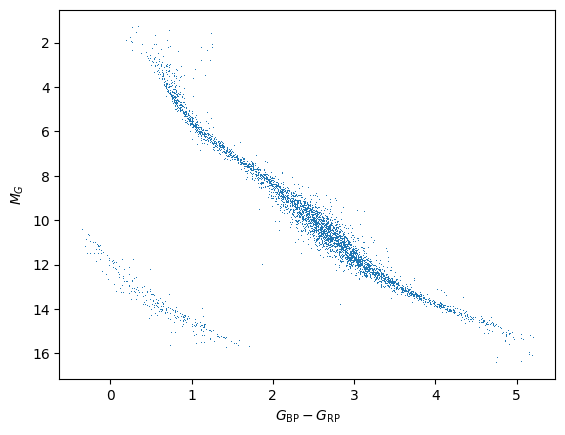

In [5]:
plt.plot(bp_rp, mg, lw=0, marker=',')
plt.gca().invert_yaxis()
plt.xlabel(r"$G_\mathrm{BP} - G_\mathrm{RP}$")
plt.ylabel("$M_G$");

In [9]:
x1, y1 = 0, 8
x2, y2 = 3, 16.5
m_ms = (y2 - y1)/(x2 - x1)
b_ms = y1 - m_ms * x1

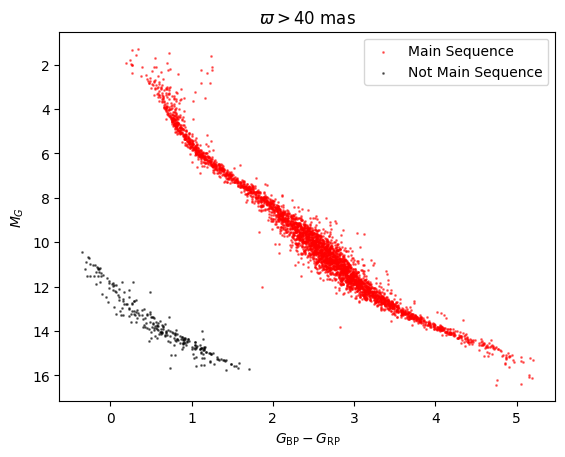

In [10]:
ms_sel = mg < m_ms * bp_rp + b_ms

plt.scatter(bp_rp[ms_sel], mg[ms_sel], s=1, alpha=0.5, color='r', label='Main Sequence')
plt.scatter(bp_rp[~ms_sel], mg[~ms_sel], s=1, alpha=0.5, color='k', label='Not Main Sequence')
plt.gca().invert_yaxis()
plt.title(r'$\varpi > 40$ mas')
plt.xlabel(r"$G_\mathrm{BP} - G_\mathrm{RP}$")
plt.ylabel(r"$M_G$")
plt.legend();

In [11]:
bp_rp = bp_rp[ms_sel]
mg = mg[ms_sel]

First the obvious way.

In [12]:
def build_hypothesis(theta_0, theta_1):
    def h(x):
        return theta_0 + theta_1 * x
    return h

def cost(theta_0, theta_1, x=bp_rp, y=mg):
    m = len(x)
    h = build_hypothesis(theta_0, theta_1)
    
    return 1/(2*m)*np.sum(np.square(h(x)-y))

In [13]:
theta_0, theta_1 = 0, 0

In [14]:
print(cost(theta_0, theta_1))

52.67800502763864


In [15]:
theta_0s = [theta_0]
theta_1s = [theta_1]
costs = [cost(theta_0, theta_1)]

In [16]:
m = len(bp_rp)
alpha = 0.01

for i in np.arange(10000):
    h = build_hypothesis(theta_0, theta_1)
    
    theta_0 -= alpha/m * np.sum(h(bp_rp) - mg)
    theta_1 -= alpha/m * np.sum((h(bp_rp) - mg) * bp_rp)
    
    theta_0s.append(theta_0)
    theta_1s.append(theta_1)
    costs.append(cost(theta_0, theta_1))

(0.0, 10500.0)

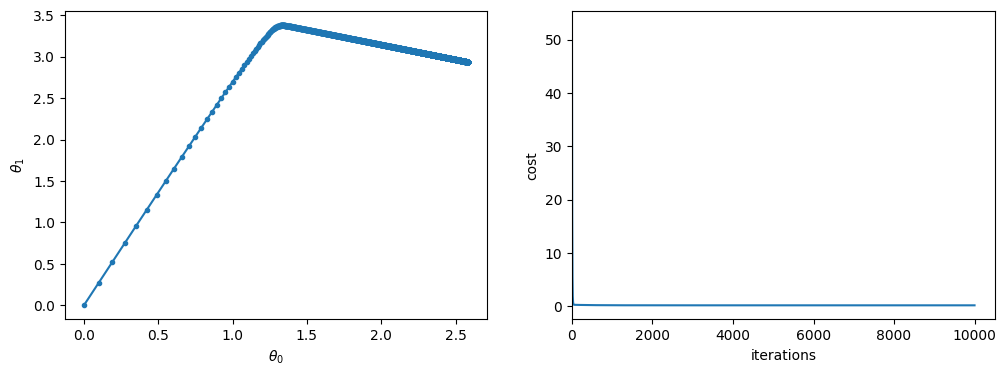

In [17]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(theta_0s, theta_1s, marker='.')
ax2.plot(costs)

ax1.set_xlabel(r'$\theta_0$')
ax1.set_ylabel(r'$\theta_1$')
ax2.set_xlabel('iterations')
ax2.set_ylabel('cost')
ax2.set_xlim(xmin=0)
# ax2.set_ylim(ymax=100)

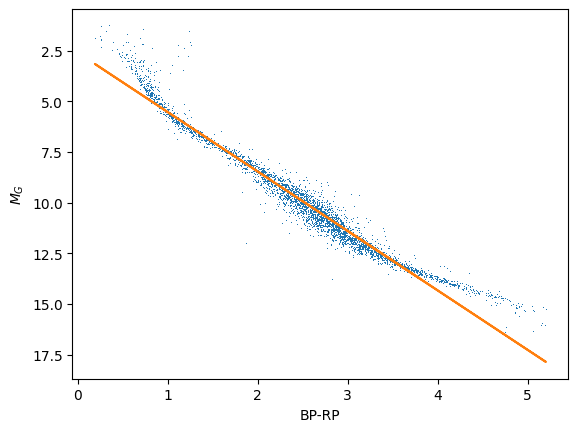

In [18]:
plt.plot(bp_rp, mg, lw=0, marker=',')
plt.gca().invert_yaxis()
plt.xlabel("BP-RP")
plt.ylabel("$M_G$");
plt.plot(bp_rp, build_hypothesis(theta_0, theta_1)(bp_rp));

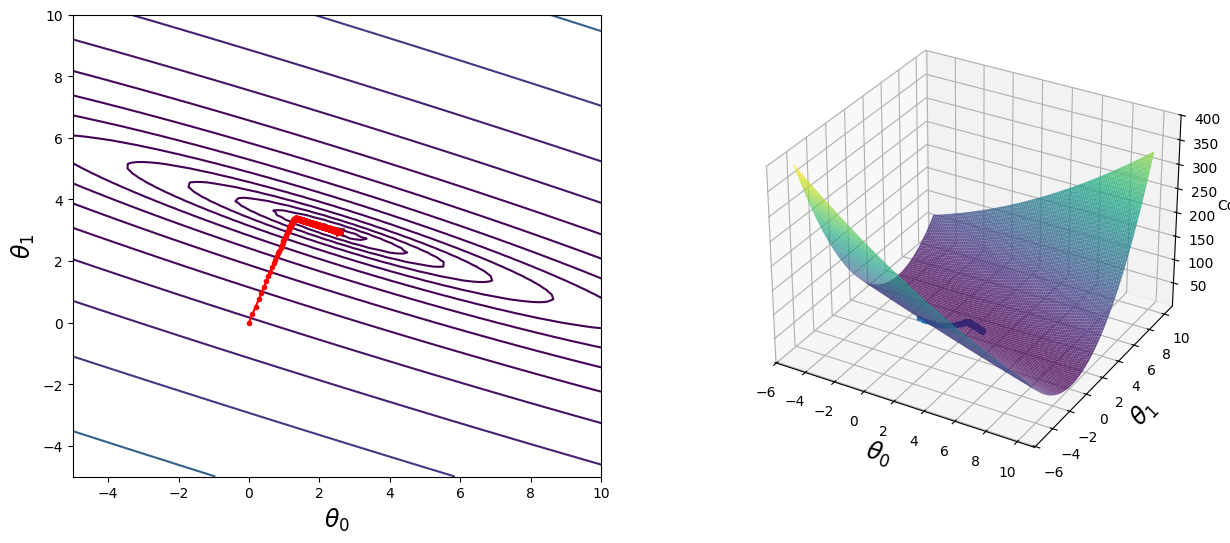

In [19]:
# Create grid coordinates for plotting
t0 = np.linspace(-5, 10, 100)
t1 = np.linspace(-5, 10, 100)
xx, yy = np.meshgrid(t0, t1, indexing='xy')
Z = np.zeros((t0.size, t1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i, j), v in np.ndenumerate(Z):
    Z[i,j] = cost(xx[i, j], yy[i, j])

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20))
ax1.plot(theta_0s, theta_1s, color='r', marker='.')
ax1.scatter(theta_0, theta_1, color='r', marker='x')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.8, cmap=plt.cm.viridis)
ax2.plot(theta_0s, theta_1s, [cost(theta0, theta1) for theta0, theta1 in zip(theta_0s, theta_1s)], marker='.')
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)

Now the less obvious way.

## Matrix-based approach

Let's say we have $m$ examples in our training set $(x^{(1)}, y^{(1)}), \ldots, (x^{(m)}, y^{(m)})$, and $n$ features.
$$
x^{(i)} =
\begin{bmatrix}
    x_0^{(i)}\\
    x_1^{(i)}\\
    x_2^{(i)}\\
    \vdots\\
    x_n^{(i)}
\end{bmatrix}
\in \mathbb{R}^{n+1}
$$

With these we can construct an $(m\times (n+1))$ *design matrix* $X$ in the following way:
$$
X =
\begin{bmatrix}
    \longleftarrow & (x^{(1)})^T & \longrightarrow  \\
    \longleftarrow & (x^{(2)})^T & \longrightarrow  \\
                   & \vdots      &                  \\
    \longleftarrow & (x^{(m)})^T & \longrightarrow  \\
\end{bmatrix}
$$

So, for example, if we only have 1 feature (in addition to $x_0=1$)
$$
x^{(i)} =
\begin{bmatrix}
    1 \\
    x_1^{(i)}
\end{bmatrix}
$$

Then our design matrix would be:
$$
X =
\begin{bmatrix}
    1 & x_1^{(1)} \\
    1 & x_1^{(2)} \\
    \vdots & \vdots \\
    1 & x_1^{(m)} \\
\end{bmatrix}
$$
and our results $y$ (really $\vec{y}$), is
$$
y =
\begin{bmatrix}
    y^{(1)} \\
    y^{(2)} \\
    \vdots \\
    y^{(m)} \\
\end{bmatrix}
$$


### Linear Regression

Using this formalism we can now write our hypothesis as

$$
h_\theta(X) = X \cdot \theta
$$

Now let's code with this formalism in mind.

In [20]:
X = np.ones((len(bp_rp), 2))
X[:, 1] = bp_rp
y = np.array(mg).reshape((-1, 1))

print(X)
print(y)

[[1.        2.9922543]
 [1.        3.7946758]
 [1.        2.4929323]
 ...
 [1.        4.1848364]
 [1.        2.8336968]
 [1.        3.8045802]]
[[11.54431342]
 [13.56378674]
 [10.19758631]
 ...
 [14.12957018]
 [11.88381561]
 [13.41174307]]


In [21]:
theta_0, theta_1 = 0., 0.
theta0 = np.array([[theta_0], [theta_1]])
theta = theta0.copy()
print(theta)

[[0.]
 [0.]]


In [22]:
def build_hypothesis(theta, X=X):
    def h(X):
        return X.dot(theta)
    return h

def cost(theta, X=X, y=y):
    m = X.shape[0]
    
    h = build_hypothesis(theta)
    J = 1/(2*m)*np.sum(np.square(h(X)-y))
    
    return J

In [24]:
print(cost(theta))

52.67800502763864


In [25]:
m = len(bp_rp)
alpha = 0.01
niter = 10000

thetas = np.empty((niter, 2))
costs = np.empty(niter)
for i in np.arange(niter):
    h = build_hypothesis(theta)
    
    theta -= alpha/m * (X.T.dot(h(X) - y))
    thetas[i] = theta.T
    costs[i] = cost(theta)

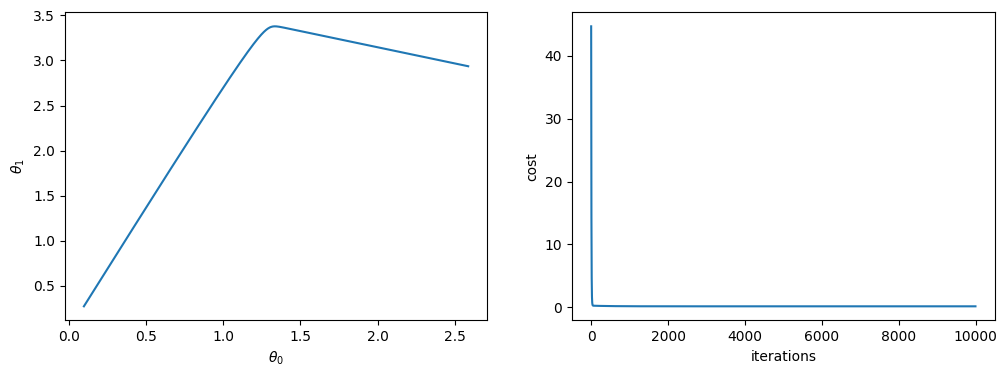

In [26]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(thetas[:, 0], thetas[:, 1])
ax2.plot(costs)

ax1.set_xlabel(r'$\theta_0$')
ax1.set_ylabel(r'$\theta_1$')
ax2.set_xlabel('iterations')
ax2.set_ylabel('cost');

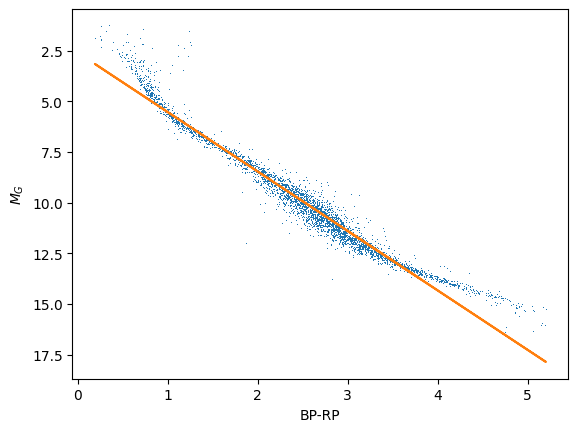

In [27]:
plt.plot(bp_rp, mg, lw=0, marker=',')
plt.gca().invert_yaxis()
plt.xlabel("BP-RP")
plt.ylabel("$M_G$");
plt.plot(bp_rp, build_hypothesis(theta)(X));

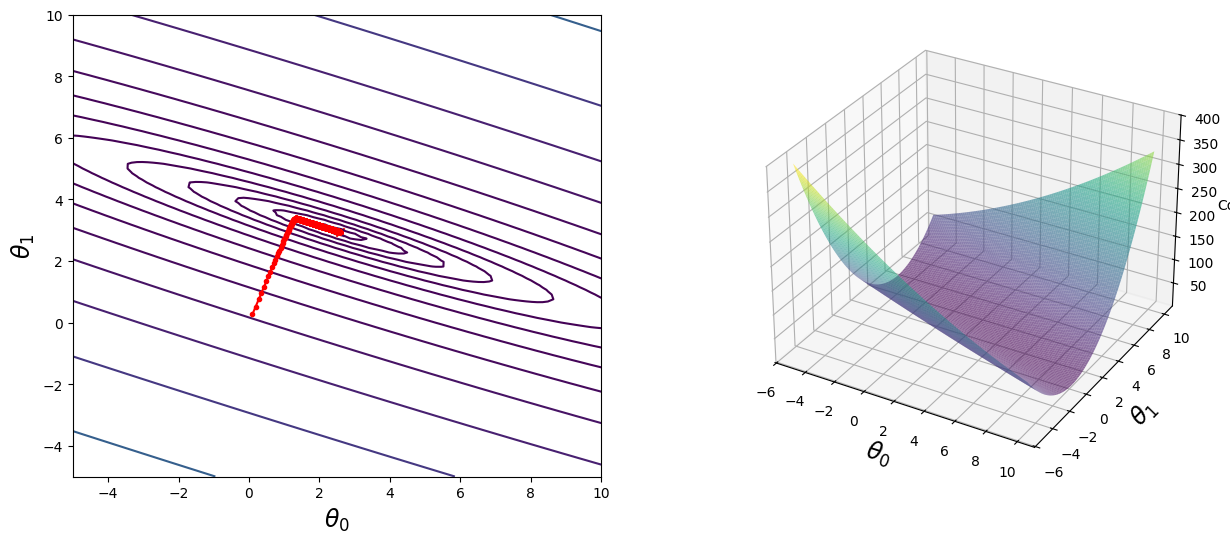

In [28]:
# Create grid coordinates for plotting
t0 = np.linspace(-5, 10, 100)
t1 = np.linspace(-5, 10, 100)
xx, yy = np.meshgrid(t0, t1, indexing='xy')
Z = np.zeros((t0.size, t1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i, j), v in np.ndenumerate(Z):
    Z[i,j] = cost([[xx[i, j]], [yy[i, j]]])

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20))
ax1.plot(thetas[:, 0], thetas[:, 1], color='r', marker='.')
ax1.scatter(theta[0], theta[1], color='r', marker='x')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.viridis)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)

We can try to be a bit smarter about this though.  If our goal is to find the minimum of the cost function $J(\theta_0, \theta_1, \ldots, \theta_n)$, and we can take derivatives of the cost function, then we can do this by solving
$$
\frac{\partial}{\partial\theta_j}J(\theta) = 0 \mathrm{~~~~(for~every~}j\mathrm{)}
$$

Doing this for the mean squared error cost function leads to
$$
\hat{\theta} = (X^TX)^{-1}X^Ty
$$
often called the *normal equation*.

Let's try it out.

In [29]:
theta_opt = np.linalg.pinv((X.T.dot(X))).dot(X.T).dot(y)

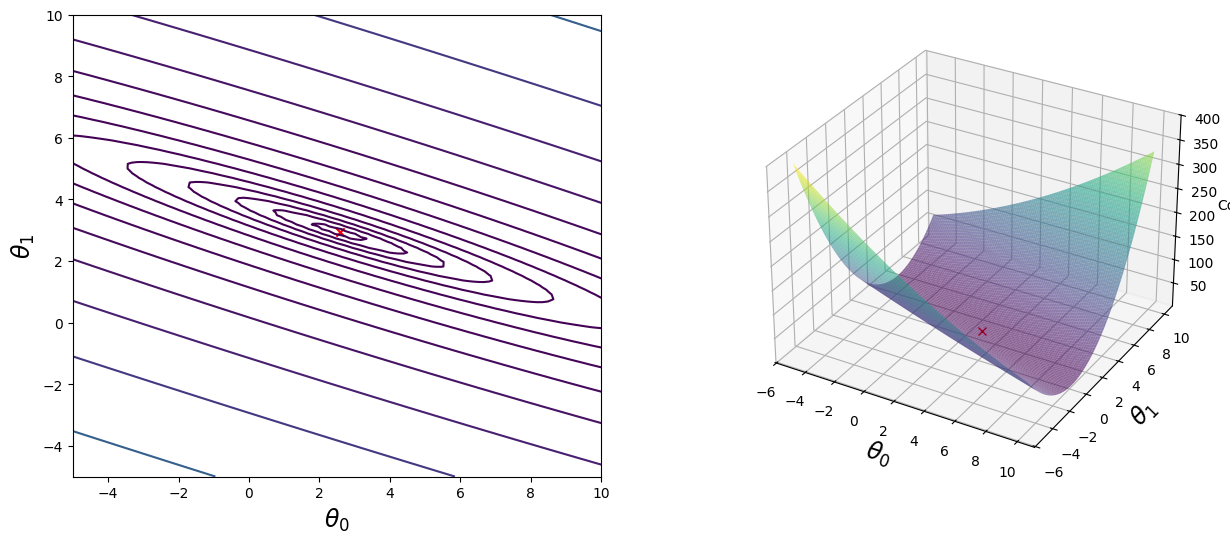

In [30]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20))
ax1.scatter(theta_opt[0], theta_opt[1], color='r', marker='x')
    
# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.viridis)
ax2.plot(theta_opt[0], theta_opt[1], cost(theta_opt), color='r', marker='x')
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)

Whoa.

This is great, but doesn't scale well with $n$.  Computing $(X^TX)^{-1}$ scales like $\mathcal{O}(n^3)$.  If $n > \sim10,000$, gradient decent may be a better approach.